In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
df = sns.load_dataset("tips")

# Einführung in Python für Data Analytics

<font size = "6">HWR Berlin</font>

<i>Sommersemester 2024</i>

<i>Alessandro Bramucci</i>

# Das Programm für heute

1. Lineare Regression
2. Logistische Regression


# 1. Lineare Regression

- In dieser Einheit wollen wir lernen, wie man lineare Regressionen in Python mit der Bibliothek *statsmodels* durchführt (`import statsmodels.api as sm`).
- Eine lineare Regression ist ein statistisches Verfahren, das genutzt wird, um die Beziehung zwischen einer abhängigen Variable (oft auch Zielvariable oder Response-Variable genannt) und einer oder mehreren unabhängigen Variablen (auch Regressoren genannt) zu modellieren.
- Das Ziel der linearen Regression ist die Parameter (oder Koeffizienten) zu schätzen die oft mit dem griechischen Buchstaben $\beta$ bezeichnet werden. 
- Die Parameter messen die Auswirkungen der Veränderung der unabhängigen Variablen auf die abhängige Variable. 
- Wir haben keine Zeit, die Formeln für die Ermittlung der $\beta$-Koeffizienten zu untersuchen. Die Formeln sind in jedem guten Ökonometrie-Lehrbuch zu finden.
- In dieser Präsentation konzentrieren wir uns darauf, wie man Regressionen in Python schätzt, wie man Koeffizienten interpretiert und wie man Regressionen für Prognosen verwendet.

### Einfache Regression

Die einfache Regressionsanalyse wird auch als "bivariate Regression" bezeichnet weil es nur zwei Variablen gibt, eine abhängige Variable und eine unabhängige Variable. Das Modell kann in der Form $y = \beta_0 + \beta_1 x + \epsilon$ dargestellt werden, wobei
- $y$ die abhängige Variable ist,
- $x$ die unabhängige Variable ist,
- $\beta_0$ der Achsenabschnitt (*Intercept*) ist,
- $\beta_1$ die Steigung (*Slope*) ist, die den Effekt der unabhängigen Variable auf die abhängige Variable beschreibt,
- $\epsilon$ der Fehlerterm ist, der die Abweichungen der tatsächlichen Werte von den durch das Modell vorhergesagten Werten darstellt. Es wird angenommen, dass der Fehlerterm im Durchschnitt Null ist, $E(\epsilon)=0$.
    

- Für diese Übung wollen wir den Datensatz *tips* aus der Biliothek *seaborn* verwenden.
- Der Datensatz enthält Informationen über Trinkgelder, die in einem Restaurant gegeben wurden, und umfasst Variablen wie die Gesamtrechnung, den Trinkgeldbetrag, das Geschlecht der Person, die die Rechnung bezahlt, ob es Raucher in der Gruppe gab, den Wochentag, die Tageszeit und die Größe der Gruppe.
- Wir möchten eine bivariate lineare Regression schätzen, die den Trinkgeldbetrag (abhängige Variable) und die Gesamtrechnung (unabhängige Variable) in Beziehung setzt.

$$\text{tip_amount} = \beta_0 + \beta_1 \text{total_bill} + \epsilon$$

- Importieren Sie die Bibliothek *seaborn*, wenn Sie die Übung replizieren möchten `import seaborn as sns`. Dann `df = sns.load_dataset("tips")`.

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


In [3]:
df.describe()

total_bill         tip        size
count  244.000000  244.000000  244.000000
mean    19.785943    2.998279    2.569672
std      8.902412    1.383638    0.951100
min      3.070000    1.000000    1.000000
25%     13.347500    2.000000    2.000000
50%     17.795000    2.900000    2.000000
75%     24.127500    3.562500    3.000000
max     50.810000   10.000000    6.000000

```python
y = df["tip"]

X = df["total_bill"]

X = sm.add_constant(X)

model = sm.OLS(y, X).fit()

print(model.summary())
```

In [4]:
y = df["tip"]
X = df["total_bill"]
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                    tip   R-squared:                       0.457
Model:                            OLS   Adj. R-squared:                  0.454
Method:                 Least Squares   F-statistic:                     203.4
Date:                Sun, 16 Jun 2024   Prob (F-statistic):           6.69e-34
Time:                        22:38:34   Log-Likelihood:                -350.54
No. Observations:                 244   AIC:                             705.1
Df Residuals:                     242   BIC:                             712.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.9203      0.160      5.761      0.0

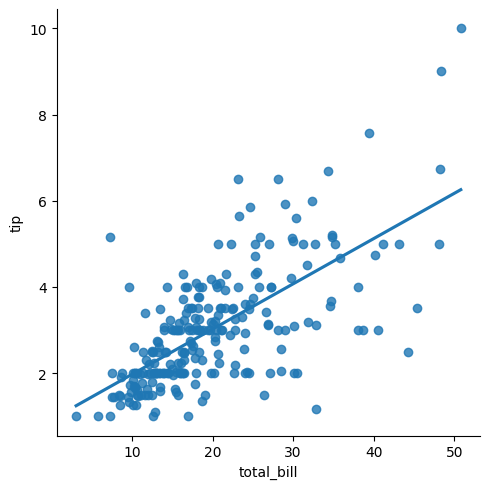

In [5]:
sns.lmplot(x = "total_bill", y = "tip", ci = None, data = df);

- Eine Erhöhung der Rechnung (*bill*) um einen Dollar bedeutet eine durchschnittliche Erhöhung des Trinkgeldes (*tip*) von $\$0,1050$.
- Wir können nun unsere geschätzten Koeffizienten verwenden, um Prognosen zu erstellen.
- Wie hoch ist das Trinkgeld, wenn die Rechnung $\$50$ beträgt?

$$0.9203 + 0.1050 \cdot 50 = 6.1703$$

- Nun wollen wir die gleiche Operation mit Python wiederholen (kleine Abweichungen aufgrund von Rundungsfehlern).

```python
X_predict = pd.DataFrame({
    'total_bill': [50]      
})

X_predict = sm.add_constant(X_predict, has_constant='add')

prediction = model.predict(X_predict)

prediction
```

In [6]:
X_predict = pd.DataFrame({
    'total_bill': [50]      
})

X_predict = sm.add_constant(X_predict, has_constant='add')

prediction = model.predict(X_predict)

prediction

0    6.171495
dtype: float64

### Multiple lineare Regression

Multiple lineare Regression: Hierbei gibt es zwei oder mehr unabhängige Variablen. Das Modell kann in der Form $y = \beta_0 + \beta_1 x_1 + \beta_2 x_2 + ... + \beta_n x_n + \epsilon$ dargestellt werden, wobei:
- $y$ die abhängige Variable ist,
- $x_1, x_2, ..., x_n$ die unabhängigen Variablen sind,
- $\beta_0$ der Achsenabschnitt (*Intercept*) ist,
- $\beta_1, \beta_2, ..., \beta_n$ die Koeffizienten sind, die die Effekte der jeweiligen unabhängigen Variablen auf die abhängige Variable beschreiben,
- $\epsilon$ der Fehlerterm ist (Annahme $E(\epsilon)=0$).

- Nun wollen wir die Übung von oben erweitern. Diesmal fügen wir die Kontrollvariable Raucher (*smoker*) hinzu.
- Damit können wir untersuchen, ob Raucher im Durchschnitt mehr Trinkgeld geben.
- Da wir zwei unabhängige Variablen haben, werden wir drei Koeffizienten schätzen, einen Achsenabschnitt $\beta_0$ und zwei Steigungskoeffizienten $\beta_1$ und $\beta_2$.

$$\text{tip_amount} = \beta_0 + \beta_1 \text{total_bill} + \beta_2 \text{smoker} + \epsilon$$

- Zunächst müssen wir eine Dummy-Variable erstellen, die den Wert $1$ annimmt, wenn der Kunde raucht, und sonst $0$.

```python
df['smoker_yes'] = np.where(df['smoker'] == 'Yes', 1, 0)
```

```python
y_ml = df["tip"]

X_ml = df[["total_bill", "smoker_yes"]]

X_ml = sm.add_constant(X_ml)

model_ml = sm.OLS(y_ml, X_ml).fit()

print(model_ml.summary())
```

In [7]:
df['smoker_yes'] = np.where(df['smoker'] == 'Yes', 1, 0)

y = df["tip"]

X = df[["total_bill", "smoker_yes"]]

X = sm.add_constant(X)

model_ml = sm.OLS(y, X).fit()

print(model_ml.summary())

                            OLS Regression Results                            
Dep. Variable:                    tip   R-squared:                       0.459
Model:                            OLS   Adj. R-squared:                  0.455
Method:                 Least Squares   F-statistic:                     102.4
Date:                Sun, 16 Jun 2024   Prob (F-statistic):           6.57e-33
Time:                        22:38:34   Log-Likelihood:                -349.93
No. Observations:                 244   AIC:                             705.9
Df Residuals:                     241   BIC:                             716.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.9632      0.164      5.861      0.0

- Ähnlich wie bei der bivariaten Regression, bedeutet eine Erhöhung der Rechnung (*bill*) um einen Dollar eine durchschnittliche Erhöhung des Trinkgeldes (*tip*) um $\$0.1057$.
- Geben Raucher mehr Trinkgeld als Nichtraucher? Nein. Ein Raucher lässt im Durchschnitt $\$ 0.1489$ weniger Trinkgeld als ein Nichtraucher.
- Wir können nun noch eine Prognose erstellen. Diesmal können wir den Effekt einbeziehen, dass der Kunde ein Raucher ist oder nicht. Bei einer Rechnung von $\$50$ gibt ein Raucher ein Trinkgeld von:

$$0.9632 + 0.1057 \cdot 50 - 0.1489 \cdot 1 = 6.0992$$

- Ein Nichtraucher gibt ein Trinkgeld von:

$$0.9632 + 0.1057 \cdot 50 - 0.1489 \cdot 0 = 6.2482$$

- Nun wollen wir die gleiche Operation mit Python wiederholen (kleine Abweichungen aufgrund von Rundungsfehlern).

```python
X_predict_ml = pd.DataFrame({
    'total_bill': [50],
    'smoker_yes': [1]
})

X_predict_ml = sm.add_constant(X_predict_ml, has_constant='add')

prediction_ml = model_ml.predict(X_predict_ml)

prediction_ml
```

In [8]:
X_predict_ml = pd.DataFrame({
    'total_bill': [50],
    'smoker_yes': [1]
})

X_predict_ml = sm.add_constant(X_predict_ml, has_constant='add')

prediction_ml = model_ml.predict(X_predict_ml)

prediction_ml

0    6.100419
dtype: float64

# 2. Logistische Regression

- Die logistische Regression ist ein statistisches Modell, das verwendet wird, um die Wahrscheinlichkeit eines Ereignisses zu modellieren, das zwei mögliche Ausgänge hat (binär).
- Im Gegensatz zur linearen Regression, die eine kontinuierliche abhängige Variable vorhersagt, wird bei der logistischen Regression eine kategorische abhängige Variable vorhergesagt, typischerweise mit zwei Klassen (z.B. Ja/Nein, Erfolg/Misserfolg).
- Die logistische Regression verwendet die logistische Funktion (auch Sigmoid-Funktion genannt), um die Wahrscheinlichkeiten zu modellieren, dass eine bestimmte Beobachtung zu einer der beiden Kategorien gehört. 
- Diese Funktion hat den Vorteil, dass sie Werte zwischen 0 und 1 ausgibt, was sie ideal für Wahrscheinlichkeiten macht.
- Der Maximum-Likelihood-Verfahren wird genutzt zur Schätzung der Koeffizienten.
- Ähnlich wie bei einer linearen Regression kann die logistische Regression eine oder mehrere unabhängige Variablen haben.

- Wenn es mehrere unabhängige Variablen gibt:

$$ln\frac{p}{1-p} = \beta_0 + \beta_1 x_1 + ... + \beta_n x_n$$

- Die linke Seite ist das so genannte Log-Odds-Ratio. Das ist nicht einfach zu interpretieren. Was wir leicht interpretieren können, ist die Wahrscheinlichkeit $p$. Mit etwas Manipulation erhalten wir:

$$ p = \frac{1}{1 + e^{-(\beta_0 + \beta_1 x_1 + ... + \beta_n x_n)}} $$

- $p$ ist die Wahrscheinlichkeit, dass das Ereignis eintritt, gegeben die unabhängigen Variablen $x_1, ..., x_n$.

- Für diese Übung verwenden wir einen anderen Datensatz. Der Datensatz enthält Informationen über die Noten einiger Studierende (*score*) und die Anzahl der Stunden, die die Studierende mit Lernen verbracht haben (*hours*). Wir haben auch Informationen über das Geschlecht.[^1]
- Unser Ziel ist es, die Wahrscheinlichkeit für das Bestehen der Prüfung in Abhängigkeit von der Studienzeit zu schätzen. Wir können auch kontrollieren, ob es Unterschiede zwischen Frauen und Männern gibt.
- Einige Variablen sind nicht vorhanden und müssen definiert werden.
- Wenn Sie die Übung wiederholen möchten, sollten Sie zunächst die Daten herunterladen.

[^1]: Die Daten sind simuliert 😁

```python
url = "https://www.alessandrobramucci.com/grades.csv"

df = pd.read_csv(url)

df.to_csv("data/gapminder.csv", sep = ";", decimal = ".")
```

In [9]:
url = "https://www.alessandrobramucci.com/grades.csv"

df = pd.read_csv(url)

df.to_csv("data/gapminder.csv", sep = ";", decimal = ".")

df.head()

score  hours  gender
0     75    4.0    Male
1     83    5.0    Male
2     55    3.5  Female
3     30    1.5    Male
4     79    3.0  Female

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22 entries, 0 to 21
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   score   22 non-null     int64  
 1   hours   22 non-null     float64
 2   gender  22 non-null     object 
dtypes: float64(1), int64(1), object(1)
memory usage: 656.0+ bytes


In [11]:
df.describe()

score      hours
count  22.000000  22.000000
mean   53.909091   4.000000
std    30.885208   2.079606
min    10.000000   0.000000
25%    24.750000   2.812500
50%    51.000000   3.875000
75%    83.000000   5.375000
max    95.000000   8.000000

- Wir definieren eine Variable Bestanden (*passed*), wenn der Studierende die Prüfung bestanden hat. Die Variable nimmt den Wert $1$ an, wenn die Benotung (*score*) größer als oder gleich 50 ist.

```python
df['passed'] = np.where(df['score'] >= 50, 1, 0)
```

- Wir erstellen auch eine Variable Männlich (*male*), wenn der Studierende männlich ist.

```python
df['male'] = np.where(df['gender'] == 'Male', 1, 0)
```

- Dann führen wir eine logistische Regression durch, bei der die abhängige Variable *passed* und die unabhängigen Variablen *hours* und *male* sind.

In [12]:
df['passed'] = np.where(df['score'] >= 50, 1, 0)
df['male'] = np.where(df['gender'] == 'Male', 1, 0)
df.head()

score  hours  gender  passed  male
0     75    4.0    Male       1     1
1     83    5.0    Male       1     1
2     55    3.5  Female       1     0
3     30    1.5    Male       0     1
4     79    3.0  Female       1     0

```python
y_lg = df["passed"]

X_lg = df[["hours", "male"]]

X_lg = sm.add_constant(X_lg)

model_lg = sm.Logit(y_lg, X_lg).fit()

print(model_lg.summary())
```

In [13]:
y_lg = df["passed"]

X_lg = df[["hours", "male"]]

X_lg = sm.add_constant(X_lg)

model_lg = sm.Logit(y_lg, X_lg).fit()

print(model_lg.summary())

Optimization terminated successfully.
         Current function value: 0.298158
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:                 passed   No. Observations:                   22
Model:                          Logit   Df Residuals:                       19
Method:                           MLE   Df Model:                            2
Date:                Sun, 16 Jun 2024   Pseudo R-squ.:                  0.5698
Time:                        22:38:35   Log-Likelihood:                -6.5595
converged:                       True   LL-Null:                       -15.249
Covariance Type:            nonrobust   LLR p-value:                 0.0001683
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -6.9745      3.661     -1.905      0.057     -14.150       0.201
hours          2.0119      0.

- Wie hoch ist die Wahrscheinlichkeit, dass ein männlicher Student, der 4 Stunden gelernt hat, die Prüfung besteht?

$$ p = \frac{1}{1 + e^{-(-6.9745 + 2.0119 \cdot 4 - 1.5885 \cdot 1)}} \approx 0.3708$$

- Nun wollen wir die gleiche Operation mit Python wiederholen (kleine Abweichungen aufgrund von Rundungsfehlern).

```python
X_predict = pd.DataFrame({
    'hours': [4],           
    'male': [1]        
})

X_predict = sm.add_constant(X_predict, has_constant='add')

predicted_probability = model_lg.predict(X_predict)

print(predicted_probability)
```

In [14]:
X_predict = pd.DataFrame({
    'hours': [4],           
    'male': [1]        
})

X_predict = sm.add_constant(X_predict, has_constant='add')

predicted_probability = model_lg.predict(X_predict)

print(predicted_probability)

0    0.373873
dtype: float64


<center><font size = "8">Vielen Dank für Ihre Aufmerksamkeit!🐍 <font><center>